Proyecto 2 - Parte 4 (base)
¡Ahora estás entrando a la fase de desarrollo del modelo del proyecto!

*  Garantiza que completes los pasos de preprocesamiento adecuados

*  Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye 
todos los modelos e hiperparámetros probados además del modelo final)

*  Evalúa el rendimiento del modelo con las métricas adecuados para el modelo

*  Elije tu modelo de “producción” y justifica esta decisión

*  Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros (recuerda que esto es para tu portafolio)

*  Compromete tu código a GitHub

Envía el enlace a tu repositorio GitHub.

https://opendata.cern.ch/record/328 Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014

| Variable                      | Description                                                                                                      |
|-------------------------------|------------------------------------------------------------------------------------------------------------------|
| EventId                       | An unique integer identifier of the event.                                                                       |
| DER_mass_MMC                  | The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.    |
| DER_mass_transverse_met_lep   | The transverse mass between the missing transverse energy and the lepton.                                       |
| DER_mass_vis                  | The invariant mass of the hadronic tau and the lepton.                                                          |
| DER_pt_h                      | The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.|
| DER_deltaeta_jet_jet          | The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1).       |
| DER_mass_jet_jet              | The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).                                              |
| DER_prodeta_jet_jet           | The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).                             |
| DER_deltar_tau_lep            | The R separation between the hadronic tau and the lepton.                                                       |
| DER_pt_tot                    | The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥ 1) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).|
| DER_sum_pt                    | The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).|
| DER_pt_ratio_lep_tau          | The ratio of the transverse momenta of the lepton and the hadronic tau.                                         |
| DER_met_phi_centrality        | The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.|
| DER_lep_eta_centrality        | The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤ 1).         |
| PRI_tau_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the hadronic tau.                                                     |
| PRI_tau_eta                   | The pseudorapidity η of the hadronic tau.                                                                       |
| PRI_tau_phi                   | The azimuth angle ϕ of the hadronic tau.                                                                        |
| PRI_lep_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the lepton (electron or muon).                                       |
| PRI_lep_eta                   | The pseudorapidity η of the lepton.                                                                             |
| PRI_lep_phi                   | The azimuth angle ϕ of the lepton.                                                                              |
| PRI_met                        | The missing transverse energy $\overrightarrow{E}^{miss}_{T}$                                                    |
| PRI_met_phi                   | The azimuth angle ϕ of the missing transverse energy                                                             |
| PRI_met_sumet                 | The total transverse energy in the detector.                                                                    |
| PRI_jet_num                   | The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3). |
| PRI_jet_leading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_eta | The pseudorapidity η of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_phi | The azimuth angle ϕ of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_subleading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_eta | The pseudorapidity η of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_phi | The azimuth angle ϕ of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_all_pt | The scalar sum of the transverse momentum of all the jets of the events. |
| Weight | The event weight wi |
| Label | The event label (string) yi ∈ {s,b} (s for signal, b for background). (objetivo) |
| KaggleSet | String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused. |
| KaggleWeight | Weight normalised within each Kaggle dataset. |


Con este dataset, se quiere predecir si un evento es una señal que corresponde a la producción de un bosón de Higgs (s) o si es un evento de fondo (b). El bosón de Higgs es una partícula elemental en el Modelo Estándar de la física de partículas y fue descubierto en 2012 en el CERN.

En este caso, el objetivo es construir un modelo de aprendizaje automático que pueda distinguir entre eventos de señal y eventos de fondo utilizando las características proporcionadas en el dataset. La variable objetivo es la columna "Label", que contiene dos posibles valores: 's' para la señal y 'b' para el fondo.

Eliminado columnas innecesarias

In [1]:
!pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importaciones de sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score)
from sklearn.preprocessing import LabelEncoder

# Importaciones de xgboost
from xgboost import XGBClassifier
import xgboost as xgb

# Importaciones de pandas
import pandas as pd

# Importaciones de numpy
import numpy as np

# Importaciones de matplotlib
import matplotlib.pyplot as plt

# Importaciones de seaborn
import seaborn as sns

# Importaciones de warnings
import warnings
warnings.filterwarnings('ignore')

# Importaciones de tensorflow y keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping

In [3]:
df_atlas=pd.read_csv('atlas-higgs-challenge-2014-v2.csv')

In [4]:
df_atlas

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.000,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.904263,b,t,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818233,918233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,...,1.190,-0.766,41.791,0.787,-1.090,154.056,0.005721,s,u,0.259892
818234,918234,99.294,30.097,62.713,65.861,3.312,471.319,-2.611,2.294,2.889,...,1.293,-0.868,70.158,-2.018,2.893,178.856,0.000461,s,u,0.020956
818235,918235,108.497,9.837,65.149,18.006,-999.000,-999.000,-999.000,2.742,18.006,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.189365,b,u,53.284258
818236,918236,96.711,20.006,66.942,29.761,-999.000,-999.000,-999.000,2.479,2.739,...,1.460,2.637,-999.000,-999.000,-999.000,30.863,0.512740,b,u,22.971060


In [5]:

df_atlas.shape

(818238, 35)

In [6]:
df_atlas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      818238 non-null  int64  
 1   DER_mass_MMC                 818238 non-null  float64
 2   DER_mass_transverse_met_lep  818238 non-null  float64
 3   DER_mass_vis                 818238 non-null  float64
 4   DER_pt_h                     818238 non-null  float64
 5   DER_deltaeta_jet_jet         818238 non-null  float64
 6   DER_mass_jet_jet             818238 non-null  float64
 7   DER_prodeta_jet_jet          818238 non-null  float64
 8   DER_deltar_tau_lep           818238 non-null  float64
 9   DER_pt_tot                   818238 non-null  float64
 10  DER_sum_pt                   818238 non-null  float64
 11  DER_pt_ratio_lep_tau         818238 non-null  float64
 12  DER_met_phi_centrality       818238 non-null  float64
 13 

-Eliminado las filas duplicadas

In [7]:
df_atlas.duplicated().sum()

0

In [8]:
df_atlas=df_atlas.drop_duplicates()

-identificado y abordado los valores faltantes: No hay valores faltantes en este conjunto de datos. Debido a la naturaleza del dataset no se puede asumir que los valores 0 o 0.00 sean datos nulos.

In [9]:
df_atlas.isnull().any()

EventId                        False
DER_mass_MMC                   False
DER_mass_transverse_met_lep    False
DER_mass_vis                   False
DER_pt_h                       False
DER_deltaeta_jet_jet           False
DER_mass_jet_jet               False
DER_prodeta_jet_jet            False
DER_deltar_tau_lep             False
DER_pt_tot                     False
DER_sum_pt                     False
DER_pt_ratio_lep_tau           False
DER_met_phi_centrality         False
DER_lep_eta_centrality         False
PRI_tau_pt                     False
PRI_tau_eta                    False
PRI_tau_phi                    False
PRI_lep_pt                     False
PRI_lep_eta                    False
PRI_lep_phi                    False
PRI_met                        False
PRI_met_phi                    False
PRI_met_sumet                  False
PRI_jet_num                    False
PRI_jet_leading_pt             False
PRI_jet_leading_eta            False
PRI_jet_leading_phi            False
P

-Identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [10]:
# Calcular el porcentaje de ceros en cada columna
zero_percentages = (df_atlas == 0).mean()

# Eliminar columnas con más del 25% de ceros
columns_to_drop = zero_percentages[zero_percentages > 0.25].index
df = df_atlas.drop(columns_to_drop, axis=1)

# Eliminar filas con ceros en alguna columna
df = df.dropna(axis=0, how='any')

# Verificar la forma del nuevo DataFrame
print(df.shape)

(818238, 33)


In [11]:
# Eliminar filas con ceros en alguna columna
df = df[(df != 0).all(axis=1)]

# Verificar la forma del nuevo DataFrame
print(df.shape)

(765736, 33)


In [12]:
df.eq(0).sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
Weight                         0
Label     

In [13]:
df_atlas['Label'].unique()

array(['s', 'b'], dtype=object)

-Producido visuales univariantes para el objetivo y todas las características

In [14]:
df_atlas.groupby('Label')['Label'].count()/df_atlas.shape[0]*100

Label
b    65.833902
s    34.166098
Name: Label, dtype: float64

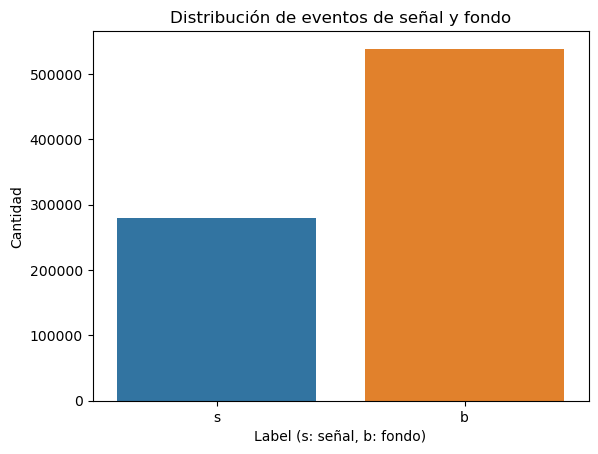

In [15]:
# Gráfico de barras para la característica 'Label'
sns.countplot(x='Label', data=df_atlas)
plt.title("Distribución de eventos de señal y fondo")
plt.xlabel("Label (s: señal, b: fondo)")
plt.ylabel("Cantidad")
plt.show()


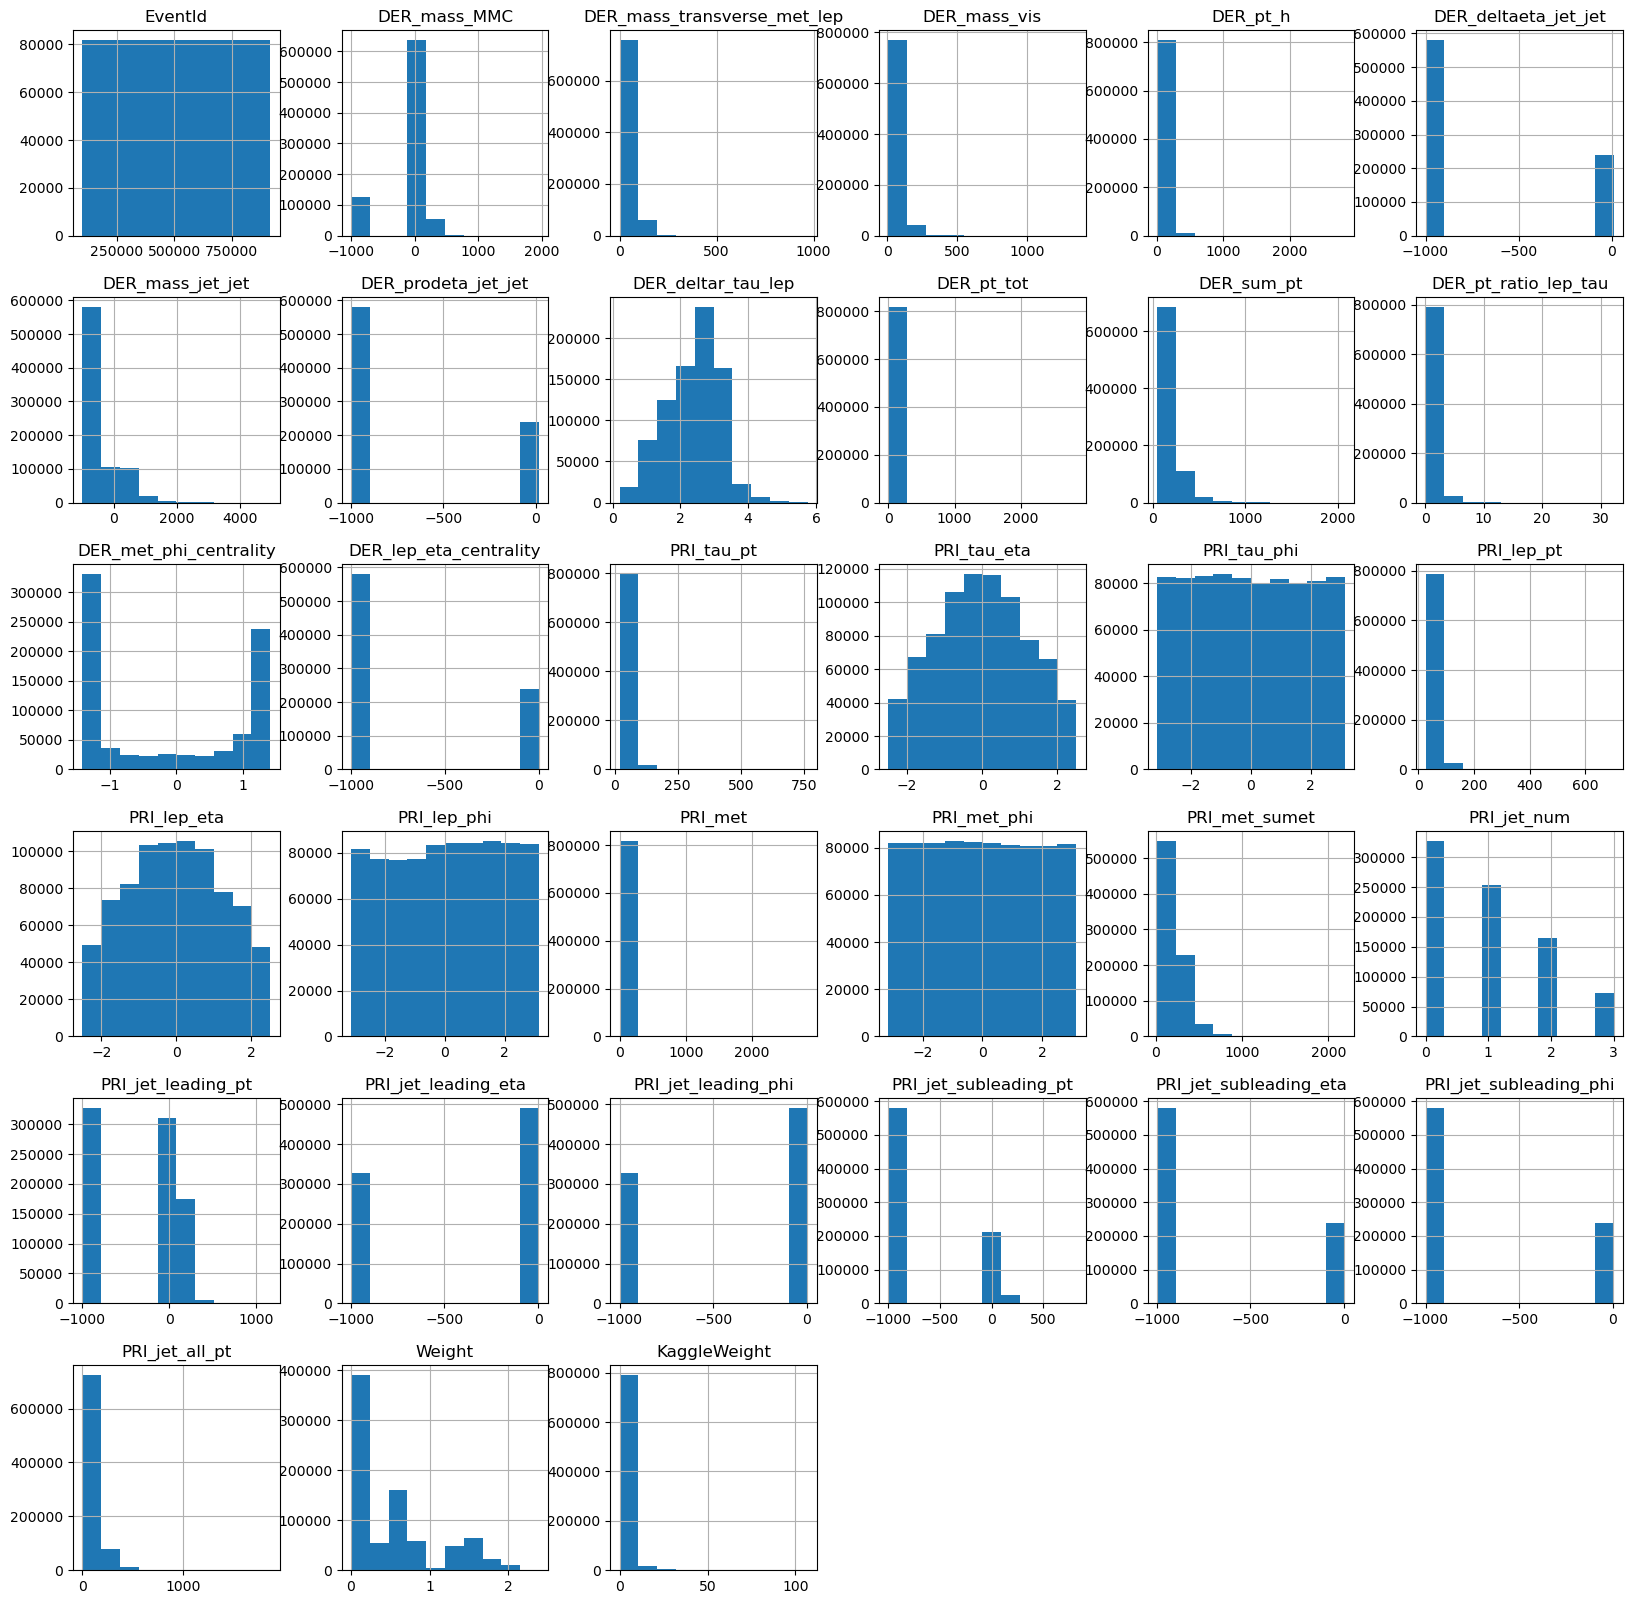

In [16]:
df_atlas.hist(figsize=(20, 20))
plt.show()


-Identificado los valores atípicos

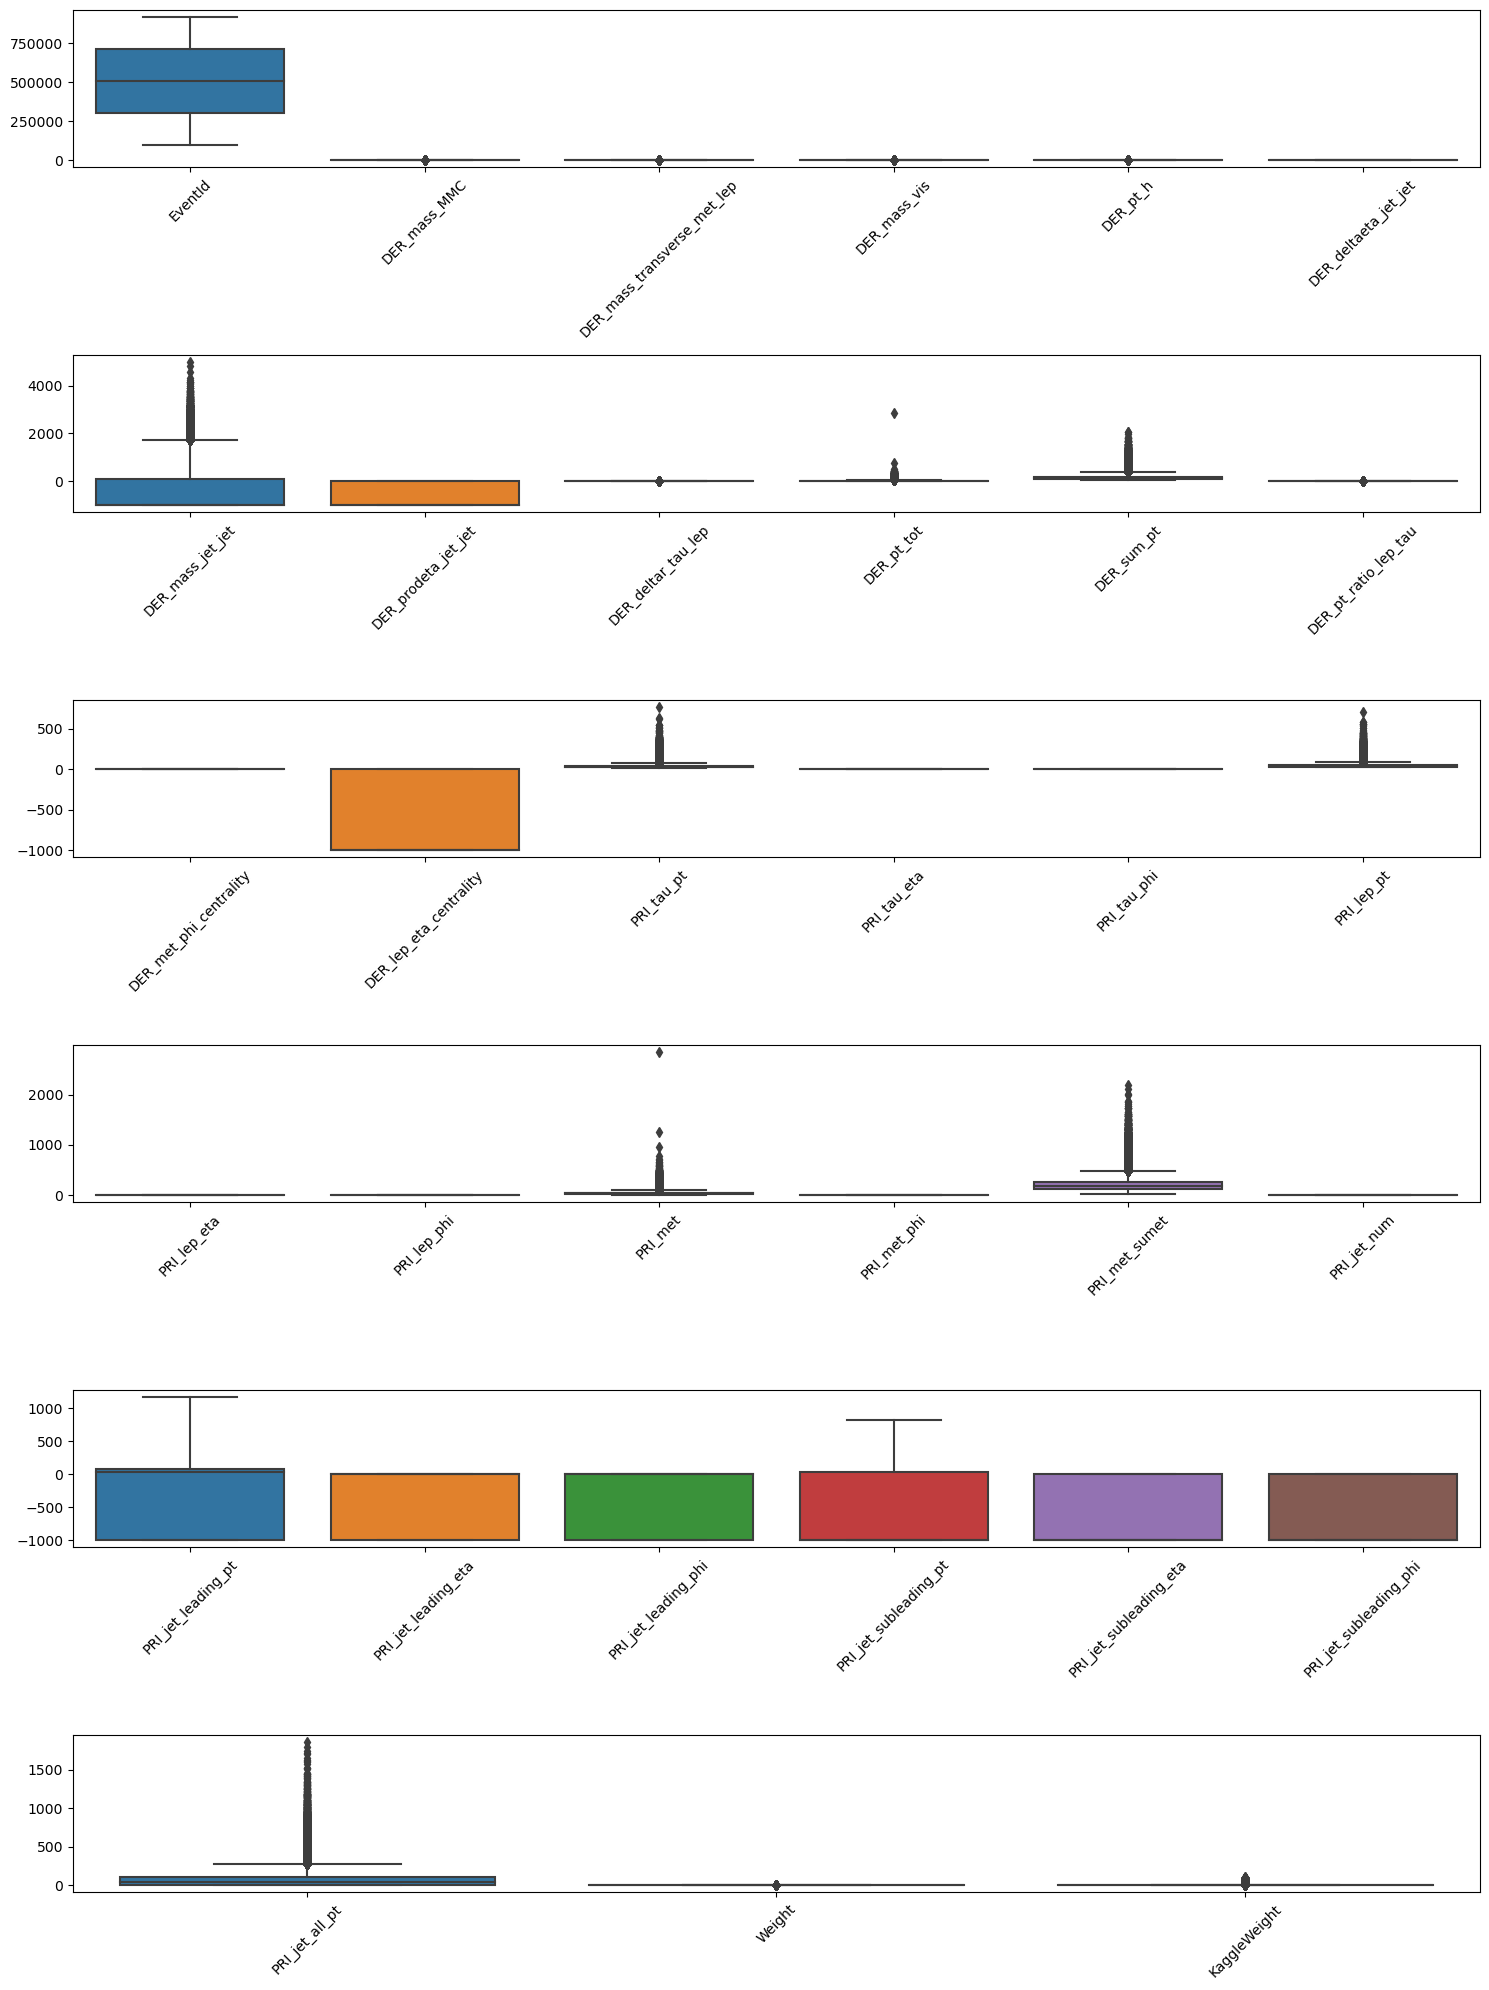

In [17]:
all_features =df_atlas.columns

num_features_per_plot = 6
num_plots = (len(all_features) + num_features_per_plot - 1) // num_features_per_plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 20))

for i, ax in enumerate(axes):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    sns.boxplot(data=df_atlas[all_features[start_idx:end_idx]], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [18]:
Q1 = df_atlas.quantile(0.25)
Q3 = df_atlas.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_atlas < (Q1 - 1.5 * IQR)) | (df_atlas > (Q3 + 1.5 * IQR))).sum() / df_atlas.size * 100 
# Filtrar solo los porcentajes distintos de cero
outliers_nonzero = outliers[outliers != 0]

print(outliers_nonzero)


DER_deltar_tau_lep             0.006949
DER_mass_MMC                   0.563469
DER_mass_jet_jet               0.013538
DER_mass_transverse_met_lep    0.021401
DER_mass_vis                   0.165942
DER_pt_h                       0.157069
DER_pt_ratio_lep_tau           0.109664
DER_pt_tot                     0.100474
DER_sum_pt                     0.140727
KaggleWeight                   0.148046
PRI_jet_all_pt                 0.126352
PRI_lep_pt                     0.154063
PRI_met                        0.148392
PRI_met_sumet                  0.116634
PRI_tau_pt                     0.160826
Weight                         0.062430
dtype: float64


-Producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

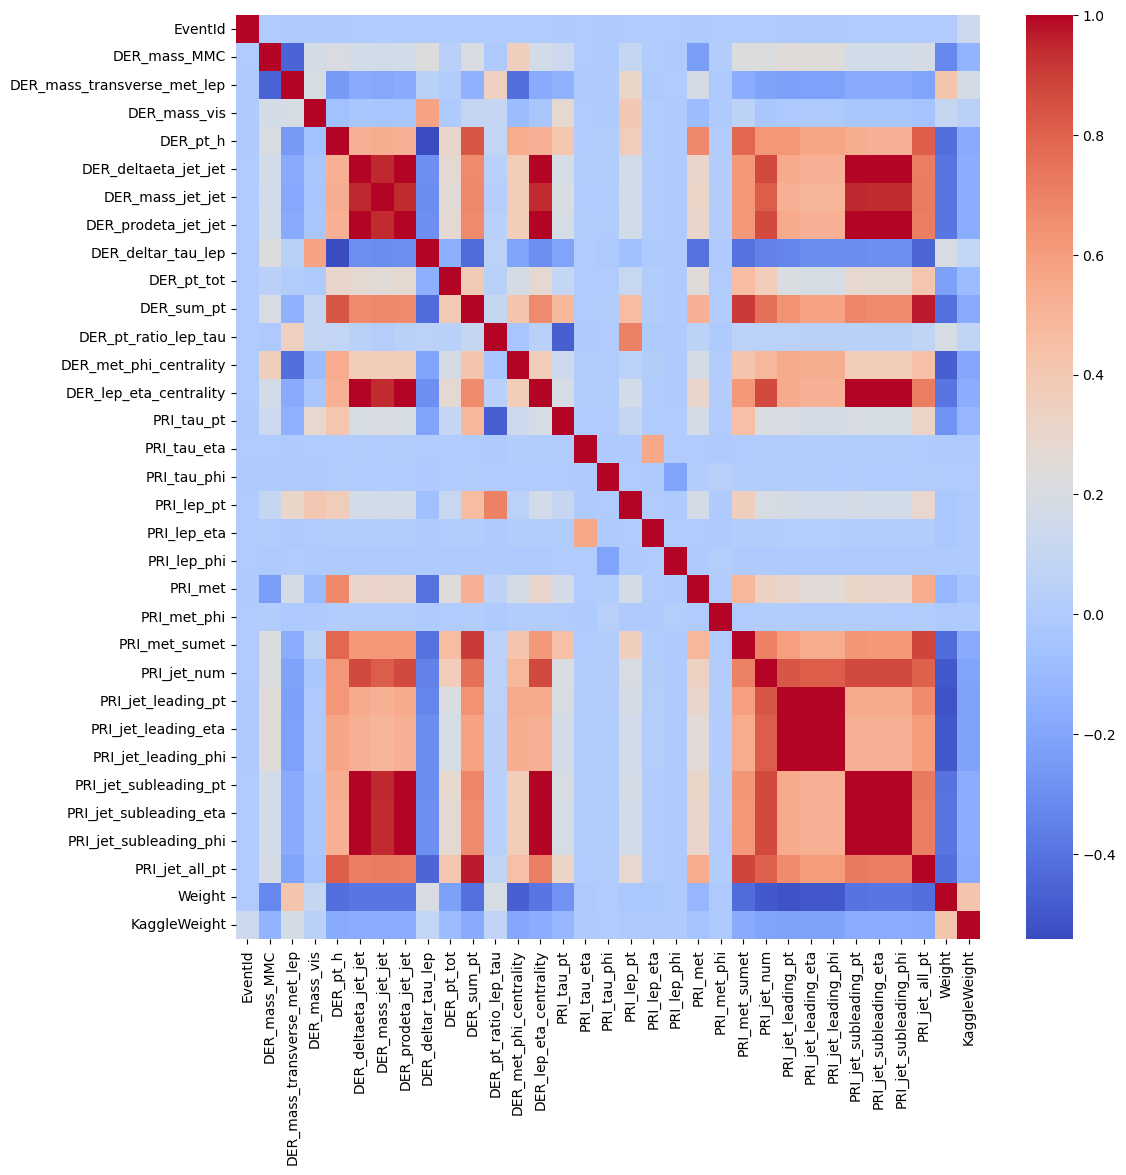

In [19]:
# Calcular la matriz de correlación
corr_matrix = df_atlas.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.show()


In [21]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet'], axis=1)
y = df_atlas['Label']

In [22]:
# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [23]:
# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo (Gradient Boosting): {:.2f}".format(accuracy_score(y_test, y_pred_gb)))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_gb))


Exactitud del modelo (Gradient Boosting): 1.00
Matriz de confusión:
[[161604      0]
 [     0  83868]]
Reporte de clasificación:
              precision    recall  f1-score   support

           b       1.00      1.00      1.00    161604
           s       1.00      1.00      1.00     83868

    accuracy                           1.00    245472
   macro avg       1.00      1.00      1.00    245472
weighted avg       1.00      1.00      1.00    245472



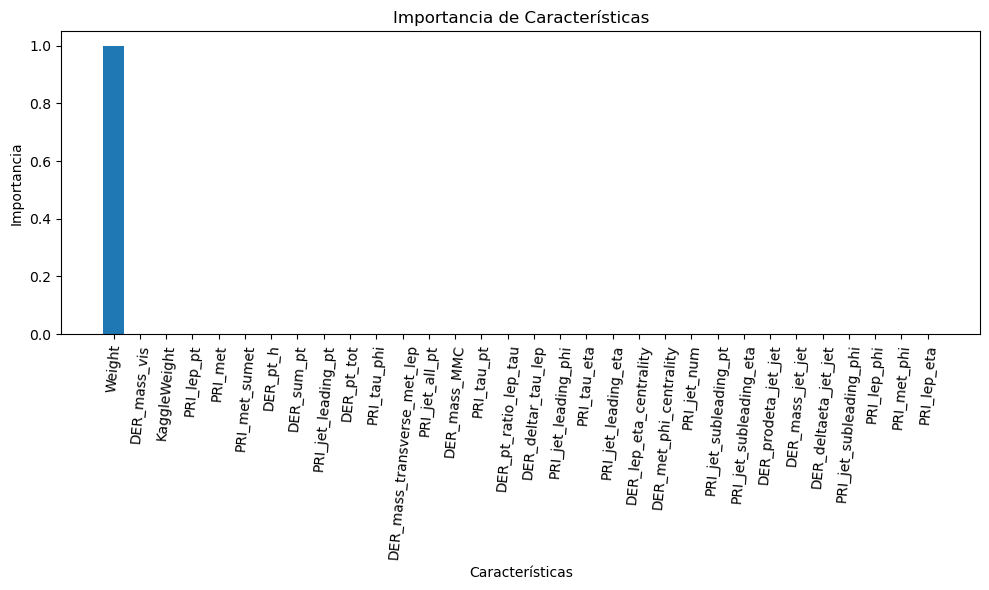

In [24]:
# Obtener la importancia de las características
feature_importance = gb_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características por importancia descendente
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=85)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()

In [25]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet','Weight'], axis=1)
y = df_atlas['Label']

In [26]:
# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo (Gradient Boosting): {:.2f}".format(accuracy_score(y_test, y_pred_gb)))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_gb))

Exactitud del modelo (Gradient Boosting): 1.00
Matriz de confusión:
[[161604      0]
 [     0  83868]]
Reporte de clasificación:
              precision    recall  f1-score   support

           b       1.00      1.00      1.00    161604
           s       1.00      1.00      1.00     83868

    accuracy                           1.00    245472
   macro avg       1.00      1.00      1.00    245472
weighted avg       1.00      1.00      1.00    245472



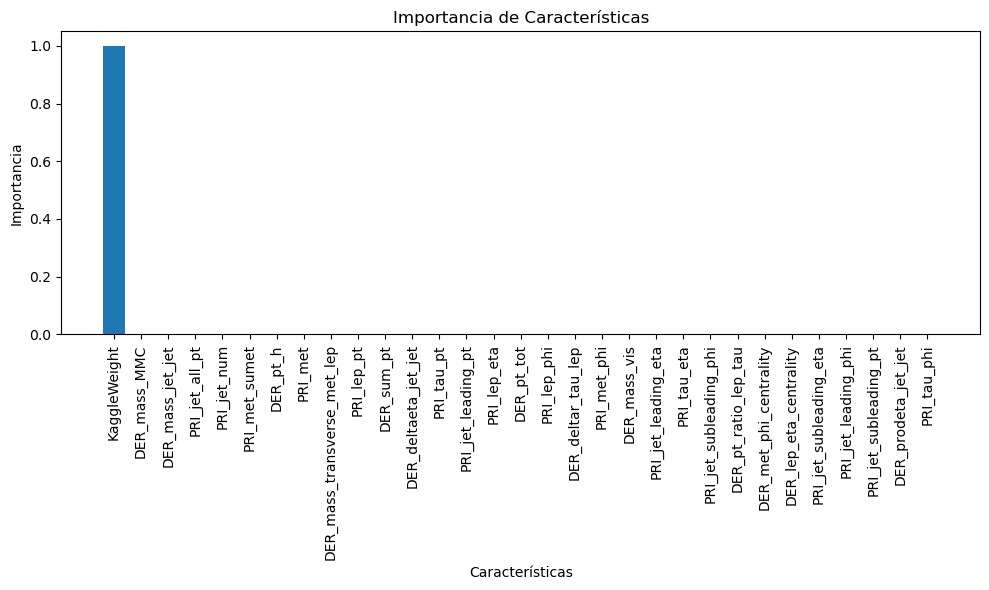

In [27]:
# Obtener la importancia de las características
feature_importance = gb_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características por importancia descendente
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()

In [28]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet','Weight','KaggleWeight'], axis=1)
y = df_atlas['Label']

In [29]:
# Dividir el conjunto de datos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo (Gradient Boosting): {:.2f}".format(accuracy_score(y_test, y_pred_gb)))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_gb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_gb))

Exactitud del modelo (Gradient Boosting): 0.83
Matriz de confusión:
[[144965  16639]
 [ 24559  59309]]
Reporte de clasificación:
              precision    recall  f1-score   support

           b       0.86      0.90      0.88    161604
           s       0.78      0.71      0.74     83868

    accuracy                           0.83    245472
   macro avg       0.82      0.80      0.81    245472
weighted avg       0.83      0.83      0.83    245472



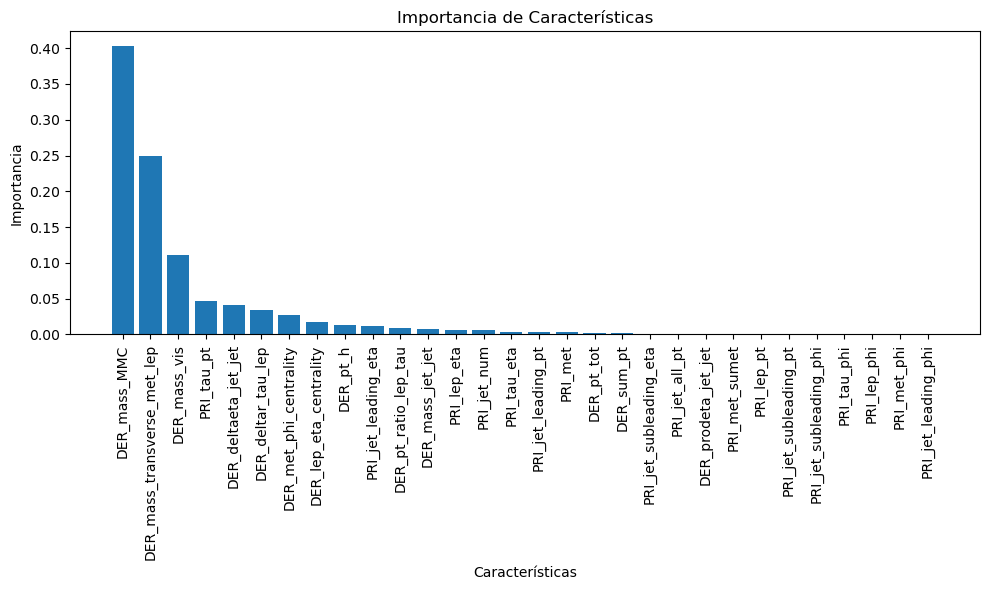

In [30]:
# Obtener la importancia de las características
feature_importance = gb_model.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características por importancia descendente
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Graficar la importancia de características
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importance)), sorted_importance, align='center')
plt.xticks(range(len(sorted_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de Características')
plt.tight_layout()
plt.show()

In [32]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet','Weight','KaggleWeight'], axis=1)
y = df_atlas['Label']
X_sample,_,y_sample,_ = train_test_split(X, y, test_size=0.995,stratify=y, random_state=42)
X_train_grid, X_test_grid, y_train_grid,y_test_grid = train_test_split(X_sample, y_sample, test_size=0.3,stratify=y_sample, random_state=42)

In [33]:
X_train_grid.shape

(2863, 30)

In [34]:

# Crear el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier()

# Entrenar el modelo
gb_model.fit(X_train_grid, y_train_grid)

# Predecir las etiquetas de los datos de prueba
y_pred_gb = gb_model.predict(X_test_grid)

# Evaluar el modelo
print("Exactitud del modelo (Gradient Boosting): {:.2f}".format(accuracy_score(y_test_grid, y_pred_gb)))
print("Matriz de confusión:")
print(confusion_matrix(y_test_grid, y_pred_gb))
print("Reporte de clasificación:")
print(classification_report(y_test_grid, y_pred_gb))

Exactitud del modelo (Gradient Boosting): 0.84
Matriz de confusión:
[[733  75]
 [121 299]]
Reporte de clasificación:
              precision    recall  f1-score   support

           b       0.86      0.91      0.88       808
           s       0.80      0.71      0.75       420

    accuracy                           0.84      1228
   macro avg       0.83      0.81      0.82      1228
weighted avg       0.84      0.84      0.84      1228



In [ ]:
# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Crear el modelo de Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_grid, y_train_grid)

# Obtener el mejor modelo después de aplicar GridSearchCV
best_model = grid_search.best_estimator_

# Predecir las etiquetas de los datos de prueba
y_pred_grid = best_model.predict(X_test_grid)

# Calcular la exactitud del mejor modelo
accuracy = accuracy_score(y_test_grid, y_pred_grid)
print("Exactitud del mejor modelo después de aplicar GridSearchCV: {:.2f}".format(accuracy))

#mostrar los mejores parametros
print(grid_search.best_params_)

Exactitud del mejor modelo después de aplicar PCA y GridSearchCV: 0.84
{'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
accuracy = accuracy_score(y_test_grid, y_pred_grid)
print("Exactitud del mejor modelo después de aplicar GridSearchCV: {:.2f}".format(accuracy))

#mostrar los mejores parametros
print(grid_search.best_params_)

Exactitud del mejor modelo después de aplicar GridSearchCV: 0.84
{'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
print(classification_report(y_test_grid, y_pred_grid))

              precision    recall  f1-score   support

           b       0.85      0.91      0.88       808
           s       0.80      0.70      0.75       420

    accuracy                           0.84      1228
   macro avg       0.83      0.80      0.81      1228
weighted avg       0.83      0.84      0.83      1228



In [ ]:
def save_model_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)


In [ ]:
save_model_pickle(best_model,'gb_classifier_gs')

In [ ]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet','Weight','KaggleWeight'], axis=1)
y = df_atlas['Label']

In [ ]:
X.shape

(818238, 30)

In [ ]:
y.shape

(818238,)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:

X_train_best, X_test_best, y_train_best,y_test_best = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
X_test_best.shape

(245472, 30)

In [ ]:
# Crear el modelo de Gradient Boosting con las mejores metricas y todo el dataset
gb_model = GradientBoostingClassifier(learning_rate=0.1,max_depth=7,min_samples_leaf=10,min_samples_split=10,n_estimators=200)

# Entrenar el modelo
gb_model.fit(X_train_best, y_train_best)

# Predecir las etiquetas de los datos de prueba
y_pred_best = gb_model.predict(X_test_best)

# Evaluar el modelo
print("Exactitud del modelo (Gradient Boosting): {:.2f}".format(accuracy_score(y_test_best, y_pred_best)))
print("Matriz de confusión:")
print(confusion_matrix(y_test_best, y_pred_best))
print("Reporte de clasificación:")
print(classification_report(y_test_best, y_pred_best))

Exactitud del modelo (Gradient Boosting): 0.84
Matriz de confusión:
[[145314  16290]
 [ 22137  61731]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88    161604
           1       0.79      0.74      0.76     83868

    accuracy                           0.84    245472
   macro avg       0.83      0.82      0.82    245472
weighted avg       0.84      0.84      0.84    245472



In [ ]:
save_model_pickle(gb_model,'gb_model.pkl')

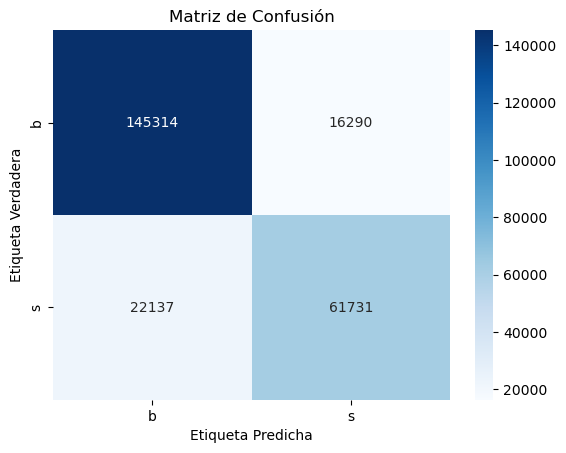

In [ ]:
# Obtiene las etiquetas de las categorías
labels = gb_model.classes_

# Grafica la matriz de confusión utilizando seaborn
sns.heatmap(confusion_matrix(y_test_best, y_pred_best), annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, stratify= y, random_state=42)

In [ ]:

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict( X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.84%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88    161604
           1       0.79      0.73      0.76     83868

    accuracy                           0.84    245472
   macro avg       0.83      0.82      0.82    245472
weighted avg       0.84      0.84      0.84    245472



In [ ]:
# Separar las características y las etiquetas
X = df_atlas.drop(['EventId', 'Label', 'KaggleSet','Weight','KaggleWeight'], axis=1)
y = df_atlas['Label']
le = LabelEncoder()
y = le.fit_transform(y)
X_sample,_,y_sample,_ = train_test_split(X, y, test_size=0.995,stratify=y, random_state=42)
X_train_xgb_grid, X_test_xgb_grid, y_train_xgb_grid,y_test_xgb_grid = train_test_split(X_sample, y_sample, test_size=0.3,stratify=y_sample, random_state=42)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train_xgb_grid,label=y_train_xgb_grid)


In [ ]:
param_grid = {
    'n_estimators': [100,200,400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'colsample_bytree': [0.3, 0.7]
}


In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)


In [ ]:
grid_search.fit(X_train_xgb_grid, y_train_xgb_grid)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 400, 500]})

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.8302456705598067


In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_xgb_grid)
print(classification_report(y_test_xgb_grid, predictions))


              precision    recall  f1-score   support

           0       0.86      0.91      0.88       808
           1       0.80      0.71      0.75       420

    accuracy                           0.84      1228
   macro avg       0.83      0.81      0.82      1228
weighted avg       0.84      0.84      0.84      1228



In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train_xgb_grid, X_test_xgb_grid, y_train_xgb_grid,y_test_xgb_grid = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
# Configurando y entrenando el modelo
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', 
                               n_estimators=200, 
                               learning_rate=0.05, 
                               max_depth=5, 
                               colsample_bytree=0.3)

xgb_model.fit(X_train_xgb_grid, y_train_xgb_grid)

# Realizando predicciones
y_pred = xgb_model.predict(X_test_xgb_grid)

# Evaluando el modelo
print("Accuracy: ", accuracy_score(y_test_xgb_grid, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test_xgb_grid, y_pred))
print("\nClassification Report: \n", classification_report(y_test_xgb_grid, y_pred))

Accuracy:  0.8380629970016947

Confusion Matrix: 
 [[145420  16184]
 [ 23567  60301]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88    161604
           1       0.79      0.72      0.75     83868

    accuracy                           0.84    245472
   macro avg       0.82      0.81      0.82    245472
weighted avg       0.84      0.84      0.84    245472



In [ ]:
save_model_pickle(xgb_model,'XGB.pkl')

In [ ]:
X_sample,_,y_sample,_ = train_test_split(X, y, test_size=0.995,stratify=y, random_state=42)
X_train_rnp, X_test_rnp, y_train_rnp,y_test_rnp = train_test_split(X_sample, y_sample, test_size=0.3,stratify=y_sample, random_state=42)

In [ ]:
# Creando el modelo
model_rnp = Sequential()
model_rnp .add(Dense(32, input_dim=X_train_rnp.shape[1], activation='relu'))
model_rnp .add(Dense(16, activation='relu'))
model_rnp .add(Dense(1, activation='sigmoid'))

# Compilando el modelo
model_rnp .compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenando el modelo
model_rnp .fit(X_train_rnp, y_train_rnp, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
72/72 [==============================] - 1s 3ms/step - loss: 13.6346 - accuracy: 0.6345 - val_loss: 3.3410 - val_accuracy: 0.6736
Epoch 2/10
72/72 [==============================] - 0s 1ms/step - loss: 2.5206 - accuracy: 0.6638 - val_loss: 1.7464 - val_accuracy: 0.6161
Epoch 3/10
72/72 [==============================] - 0s 1ms/step - loss: 1.7903 - accuracy: 0.6786 - val_loss: 1.7385 - val_accuracy: 0.5986
Epoch 4/10
72/72 [==============================] - 0s 1ms/step - loss: 1.4988 - accuracy: 0.6821 - val_loss: 1.3720 - val_accuracy: 0.6562
Epoch 5/10
72/72 [==============================] - 0s 1ms/step - loss: 1.1315 - accuracy: 0.7031 - val_loss: 0.9599 - val_accuracy: 0.7086
Epoch 6/10
72/72 [==============================] - 0s 1ms/step - loss: 1.0513 - accuracy: 0.6926 - val_loss: 1.0249 - val_accuracy: 0.6911
Epoch 7/10
72/72 [==============================] - 0s 1ms/step - loss: 1.1868 - accuracy: 0.6764 - val_loss: 1.3530 - val_accuracy: 0.6963
Epoch 8/10
72/72 [=

In [ ]:
# Evaluando el modelo en los datos de prueba
loss, accuracy = model_rnp.evaluate(X_test_rnp, y_test_rnp)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


39/39 [==============================] - 0s 974us/step - loss: 1.3676 - accuracy: 0.6189
Test Loss: 1.3675626516342163
Test Accuracy: 0.6188924908638


In [ ]:
y_pred_rnp=model_rnp.predict(X_test_rnp)

39/39 [==============================] - 0s 737us/step


In [ ]:
y_pred_class_rnp = (y_pred_rnp > 0.5).astype(int)

In [ ]:
print(classification_report(y_test_rnp,y_pred_class_rnp))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65       808
           1       0.47      0.76      0.58       420

    accuracy                           0.62      1228
   macro avg       0.64      0.65      0.62      1228
weighted avg       0.70      0.62      0.63      1228



Epoch 1/10
72/72 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.6965 - val_loss: 0.9473 - val_accuracy: 0.6545
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.7004 - val_loss: 0.6649 - val_accuracy: 0.7330
Epoch 3/10
72/72 [==============================] - 0s 1ms/step - loss: 0.7200 - accuracy: 0.7079 - val_loss: 0.7736 - val_accuracy: 0.6963
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.7815 - accuracy: 0.7114 - val_loss: 0.7788 - val_accuracy: 0.6859
Epoch 5/10
72/72 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.7262 - val_loss: 0.7032 - val_accuracy: 0.7155
Epoch 6/10
72/72 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7205 - val_loss: 0.6310 - val_accuracy: 0.7277
Epoch 7/10
72/72 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.7057 - val_loss: 0.6987 - val_accuracy: 0.6963
Epoch 8/10
72/72 [==

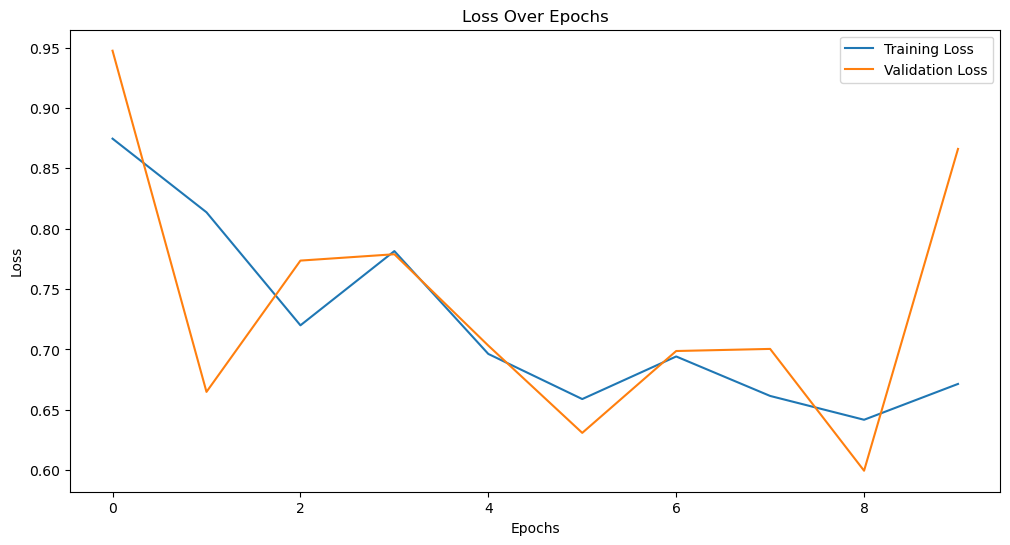

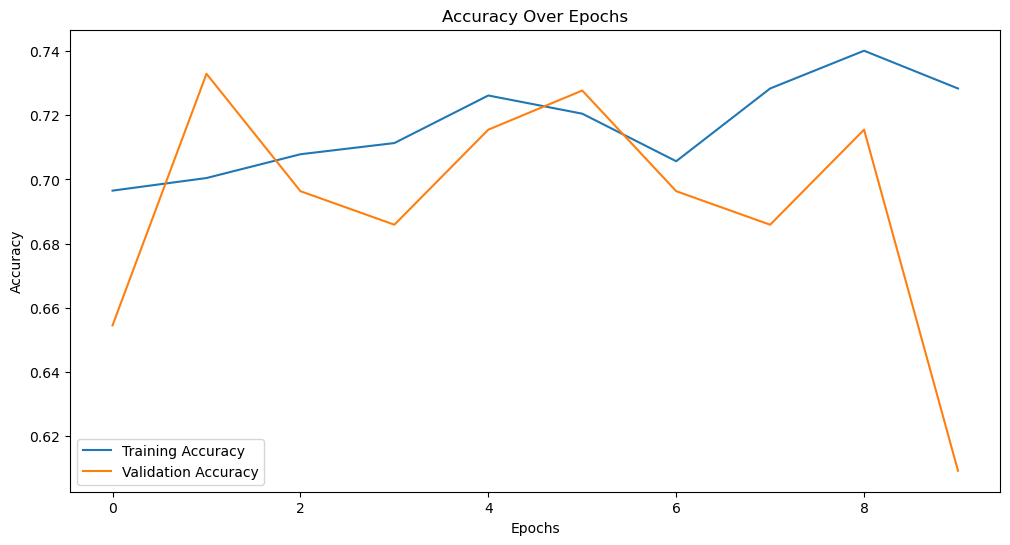

In [ ]:
# Entrenando el modelo y guardando el histórico
history = model.fit(X_train_rnp, y_train_rnp, epochs=10, batch_size=32, validation_split=0.2)

# Creando gráficos para la pérdida y la precisión en la formación

# Gráfico para la pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfico para la precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Crear un callback de detención temprana
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Definiendo el modelo para la sintonización
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input',
                                 min_value=32,
                                 max_value=512,
                                 step=32),
                    input_dim=X_train_rnp.shape[1],
                    activation=hp.Choice('dense_activation', 
                                         values=['relu', 'tanh', 'sigmoid'],
                                         default='relu')))
    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_dense_{i}',
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation=hp.Choice(f'dense_activation_{i}', 
                                             values=['relu', 'tanh', 'sigmoid'],
                                             default='relu')))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=50,  # Aumenta el número de pruebas
                     executions_per_trial=3,
                     directory='project_dir',
                     project_name='Intro_to_Keras')

tuner.search_space_summary()

# Añade el callback de EarlyStopping a la función fit
tuner.search(X_train_rnp, y_train_rnp, epochs=50, validation_split=0.2, callbacks=[es])

best_model = tuner.get_best_models()[0]

tuner.results_summary()


INFO:tensorflow:Reloading Tuner from project_dir\Intro_to_Keras\tuner0.json
Search space summary
Default search space size: 15
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_dense_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dense_activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
units_dense_1 (Int)
{'default': 

In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)
loss, accuracy = best_model.evaluate(X_test_rnp, y_test_rnp)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

{'units_input': 480, 'units_hidden': 448, 'learning_rate': 0.0001, 'dense_activation': 'tanh', 'n_layers': 3, 'units_dense_0': 224, 'dense_activation_0': 'relu', 'units_dense_1': 96, 'dense_activation_1': 'tanh', 'units_dense_2': 480, 'dense_activation_2': 'relu', 'units_dense_3': 512, 'dense_activation_3': 'sigmoid', 'units_dense_4': 384, 'dense_activation_4': 'tanh'}
39/39 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8322
Loss:  0.3984256088733673
Accuracy:  0.8322475552558899


In [ ]:
loss, accuracy = best_model.evaluate(X_test_rnp, y_test_rnp)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


39/39 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7573
Loss:  0.5142813324928284
Accuracy:  0.757328987121582


In [ ]:
X_train_rnp_best, X_test_rnp_best, y_train_rnp_best,y_test_rnp_best = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
y_pred_best_rnp=best_model.predict(X_test_rnp_best)
y_pred_best_class_rnp  =    (y_pred_best_rnp > 0.5).astype(int)

7671/7671 [==============================] - 8s 1ms/step


In [ ]:
print(classification_report(y_test_rnp_best,y_pred_best_class_rnp))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86    161604
           1       0.76      0.66      0.71     83868

    accuracy                           0.81    245472
   macro avg       0.80      0.78      0.79    245472
weighted avg       0.81      0.81      0.81    245472



In [ ]:
# Crear un callback de detención temprana
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Entrenar el mejor modelo con los datos de entrenamiento y el callback de detención temprana
history = best_model.fit(X_train_rnp_best, y_train_rnp_best, epochs=50, validation_split=0.3, callbacks=[es])


Epoch 1/50
12530/12530 [==============================] - 36s 3ms/step - loss: 0.4768 - accuracy: 0.7728 - val_loss: 0.4601 - val_accuracy: 0.7834
Epoch 2/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4578 - accuracy: 0.7867 - val_loss: 0.4419 - val_accuracy: 0.7978
Epoch 3/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4523 - accuracy: 0.7890 - val_loss: 0.4419 - val_accuracy: 0.7960
Epoch 4/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4457 - accuracy: 0.7933 - val_loss: 0.4373 - val_accuracy: 0.7939
Epoch 5/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4405 - accuracy: 0.7961 - val_loss: 0.4324 - val_accuracy: 0.8022
Epoch 6/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4350 - accuracy: 0.8001 - val_loss: 0.4450 - val_accuracy: 0.7843
Epoch 7/50
12530/12530 [==============================] - 35s 3ms/step - loss: 0.4260 - accuracy: 0.8052 - val_loss: 0

In [ ]:
save_model_pickle(history, 'Red_Neuronal_Profunda.pkl')

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predicciones para los tres modelos
y_pred_dl = best_model.predict(X_test)  # deep learning
y_pred_xgb = xgb_model.predict(X_test)  # XGBoost
y_pred_gbc = gb_model.predict(X_test) # GradientBoostingClassifier
y_pred_gbc = le.transform(y_pred_gbc)
# Conversión de las predicciones de deep learning de probabilidades a clases
y_pred_dl_class = (y_pred_dl > 0.5).astype(int)

# Métricas de evaluación
models = ['Deep Learning', 'XGBoost', 'GradientBoostingClassifier']
predictions = [y_pred_dl_class, y_pred_xgb, y_pred_gbc]

for i, pred in enumerate(predictions):
    acc = accuracy_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print(f"Model: {models[i]}")
    print(f"Accuracy: {acc:.3f}")
    print(f"ROC AUC Score: {roc_auc:.3f}")
    print("-----------------------------")


7671/7671 [==============================] - 8s 1ms/step
Model: Deep Learning
Accuracy: 0.815
ROC AUC Score: 0.778
-----------------------------
Model: XGBoost
Accuracy: 0.838
ROC AUC Score: 0.809
-----------------------------
Model: GradientBoostingClassifier
Accuracy: 0.821
ROC AUC Score: 0.789
-----------------------------


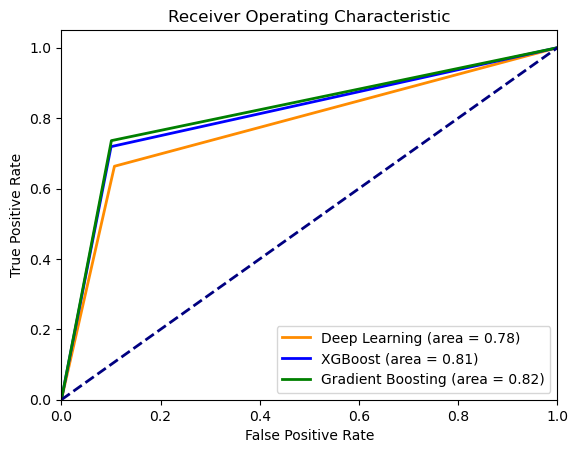

In [ ]:
# Obtener las tasas de verdaderos y falsos positivos
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_dl_class)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_gbc)

# Obtener AUC
roc_auc_dl = auc(fpr_dl, tpr_dl)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Generar el gráfico
plt.figure()
plt.plot(fpr_dl, tpr_dl, color='darkorange', lw=2, label='Deep Learning (area = %0.2f)' % roc_auc_dl)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label='Gradient Boosting (area = %0.2f)' % roc_auc_gbc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()